
# Sentiment Analysis IMDB Movie Reviews
#### SOC41130 - AI and Society
Student name: Idelson Mindo  | 
Student Number: 22204464

### Introduction

This project aims to examine sentiment analysis on IMDB Movie Reviews prediting the number of positive and negative reviews using logistic regression. In this Project, we will use NLP to find the sentiment of a given movie review. Sentiment Analysis is the interpretation and classification of emotions (positive, negative, and neutral) within text data using text analysis techniques.

We will use the IMDB Movie Reviews dataset which contains a collection of 50,000 movie reviews. The dataset is split into 25,000 reviews for training and 25,000 reviews for testing. The reviews are labeled as positive (1) or negative (0).

The objective of this project is to use logistic regression to predict the sentiment of a given movie review by training a model on the training set and evaluating its performance on the test set.

### Methods

Data - The IMDB Movie Reviews dataset consists of 50,000 movie reviews. The dataset is split into 25,000 reviews for training and 25,000 reviews for testing. The reviews are labeled as positive (1) or negative (0). The dataset is provided in a .csv file with two columns: the review  and the label named as sentiment (1 or 0).

In this project, we will use logistic regression to predict the sentiment of a given movie review.Logistic regression is a type of supervised machine learning algorithm used for classification problems. It is used to predict a binary outcome (1 or 0) based on a set of independent variables.

To build the model, we will first pre-process the data by tokenizing the review text and removing stop words. We will then vectorize the data using a bag of words and scikit-learn’s TfidfTransformer to convert sample
text to vector of tf-idf values approach. Finally, we will train the logistic regression model on the training set and evaluate its performance on the test set.

#### Import libaries

We start by iidentifyingall libraries that will be necessary to perform the tasks in the project.

In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import re
from nltk.corpus import stopwords # Import the stop word list
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from gensim.corpora.dictionary import Dictionary # Import Dictionary
from collections import defaultdict
import itertools
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mindo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mindo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Data Processing

For our luck, the dataset provided is clean, so is not necessary to do hard tasks related to cleaning the data, remains tasks related to remove existing html tags, english stop words, repeted words, converting numbers to "NUMBER" and to lowercase. Therefore we can focus our efforts on the development of models and algorithms to get the best results out of our data.

In [2]:
movie_data=pd.read_csv('movie_data.csv') #importing data
print(movie_data.shape) # printing the shape of data
movie_data.head(10) # printing a sample of data frist 10 rows

(50000, 2)


,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0
5,Leave it to Braik to put on a good show. Final...,1
6,Nathan Detroit (Frank Sinatra) is the manager ...,1
7,"To understand ""Crash Course"" in the right cont...",1
8,I've been impressed with Chavez's stance again...,1
9,This movie is directed by Renny Harlin the fin...,1


#### Inspecting the data

Our dataset consists of 5000 rows, indexed from 0 to 49,999, and two columns. The first column holds the review, and the second column displays the sentiment, with 25,000 positive and 25,000 negative sentiments in total.

In [3]:
movie_data.info()  #print a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [4]:
movie_data['sentiment'].value_counts() # print the total values by sentiment

1    25000
0    25000
Name: sentiment, dtype: int64

# Clean the text

Remove existing html tags, english stop words, repeted words, converting numbers to "NUMBER" and to lowercase

In [5]:
def clean_review(review,  remove_digits=True): # Function to clean reviews
    removehtml = re.sub(r'<[^<>]+>', " ", str(review))  # removing html tags
    convertNum = re.sub('\d+', 'NUMBER', removehtml)   # Converting numbers to "NUMBER"
    lowerCase = convertNum.lower()     # Converting to lower case  
    words = re.split('\W+', lowerCase)   # Splitting into individual words  
    stopWords = set(stopwords.words("english")+ ['film', 'movie', 'say', 'fact',
        'director','one', 'find','end', 'number', 'make','minute','even', 'scene','see',
        'story','character', 'people', 'show', 'well', 'films', 'movies','way',
        'good', 'characters', 'time', 'thing','first', 'made', 'think','ok','hi']) # Removing stopwords
    relevant_words = [w for w in words if not w in stopWords] # Removing stop words.
    return ( " ".join(relevant_words))   

movie_data['review']=movie_data['review'].apply(clean_review) #Apply function on review column
movie_data['review'] # print the dataframe

0        teenager martha moxley maggie grace moves high...
1        really like kris kristofferson usual easy goin...
2         spoiler read watching although would waste pl...
3        seen wonderful im sure thet would liked much l...
4        recently bought dvd forgetting much hated vers...
                               ...                        
49995    lets start best building although hard believe...
49996    british heritage industry control nothing wron...
49997    know begin family worst line dialogue ever hea...
49998    richard tyler little boy scared everything lik...
49999    waited long watch also like bruce willis plot ...
Name: review, Length: 50000, dtype: object

This code is taking the 'review' column from the movie_data dataframe and looping through each of the reviews. For each review, it is running the clean_review function and adding the output of that function to the cleanWords list. Once all of the reviews have been looped through, the code prints out "---Sucess!---\n"

In [26]:
cleanWords = [clean_review(review) for review in movie_data['review']] #Review Process
print("---Sucess!---\n")

---Sucess!---



In [7]:
len(cleanWords) # reviews lenght

50000

The cleanWords has a total of 50000, so it mantains the same lenght as the original dataset. 

### 1. Transform each review into feature vectors using bag-of-words model from NLP

This code bellow tokenizes a list of movie data, by first performing a word tokenization to convert the data into lowercase and then creating a new list of tokens words. It then creates a dictionary of these tokenized words and prints out the length of the list. Finally, it checks if the character ':' is present in the list.

In [8]:
# better_tokenized_movie_data will contain a list of lists of tokens words
tokenized_movie_data = [word_tokenize(doc.lower()) # Tokenize movie data
                  for doc in cleanWords]

better_tokenized_movie_data = [] # create an empty list 
for doc in tokenized_movie_data: # loop through the tokenized_movie_data
  tokens = []  # create an empty list to store the words with more than 3 characters
 
  for word in doc: # loop through the words
    if len(word) > 3: # check if the word has more than 3 characters
      tokens.append(word)   # append the word to the tokens list
  better_tokenized_movie_data.append(tokens)   # append the tokens list to the better_tokenized_movie_data

print(len(better_tokenized_movie_data)) # print the length of the better_tokenized_movie_data
print(':' in better_tokenized_movie_data)# prints whether the ':' symbol is in the better_tokenized_movie_data

dictionary = Dictionary(better_tokenized_movie_data)# create a dictionary using the better_tokenized_movie_data
print(len(better_tokenized_movie_data[0]))# print the length of the fourth item in the better_tokenized_movie_data

50000
False
116


This code bellow is using the Gensim library to create a document corpus

In [9]:
review_id = dictionary.token2id.get("wager") # Select the id for "wager":
print(review_id) 
print(dictionary.get(review_id)) # Use word_id with the dictionary to print the word
corpus = [dictionary.doc2bow(news) for news in better_tokenized_movie_data] # Create a MmCorpus: corpus
print(corpus[100])

14553
wager
[(26, 1), (40, 1), (74, 1), (136, 1), (150, 1), (153, 3), (159, 1), (191, 1), (197, 1), (203, 1), (207, 1), (220, 2), (236, 1), (280, 1), (293, 1), (307, 1), (328, 1), (502, 1), (509, 1), (679, 1), (699, 1), (709, 1), (737, 1), (744, 1), (757, 1), (797, 1), (861, 1), (883, 4), (917, 3), (1093, 2), (1200, 1), (1286, 3), (1354, 1), (1378, 1), (1430, 1), (1452, 1), (1471, 1), (1531, 1), (1544, 1), (1553, 1), (1628, 1), (1639, 1), (1668, 1), (1744, 1), (1839, 1), (1886, 1), (1894, 1), (2130, 1), (2354, 1), (2577, 1), (2608, 2), (2636, 1), (2664, 1), (3107, 1), (3252, 1), (3437, 1), (3550, 1), (3622, 1), (3931, 1), (4202, 1), (4313, 1), (4314, 1), (4315, 1), (4316, 1), (4317, 3), (4318, 1), (4319, 1), (4320, 1), (4321, 1), (4322, 1), (4323, 1), (4324, 1), (4325, 1), (4326, 2), (4327, 1), (4328, 1), (4329, 1), (4330, 1)]



Top 10 words across all reviewers:
like 40172
would 24602
really 23094
much 19318
great 18144
also 17977
could 15565
watch 13947
many 13446
seen 13375

Top 10 words in the current reviewer:
scenes 4
really 3
shepherd 3
done 3
downey 3
great 2
heaven 2
half 2
reincarnated 2
emotion 1


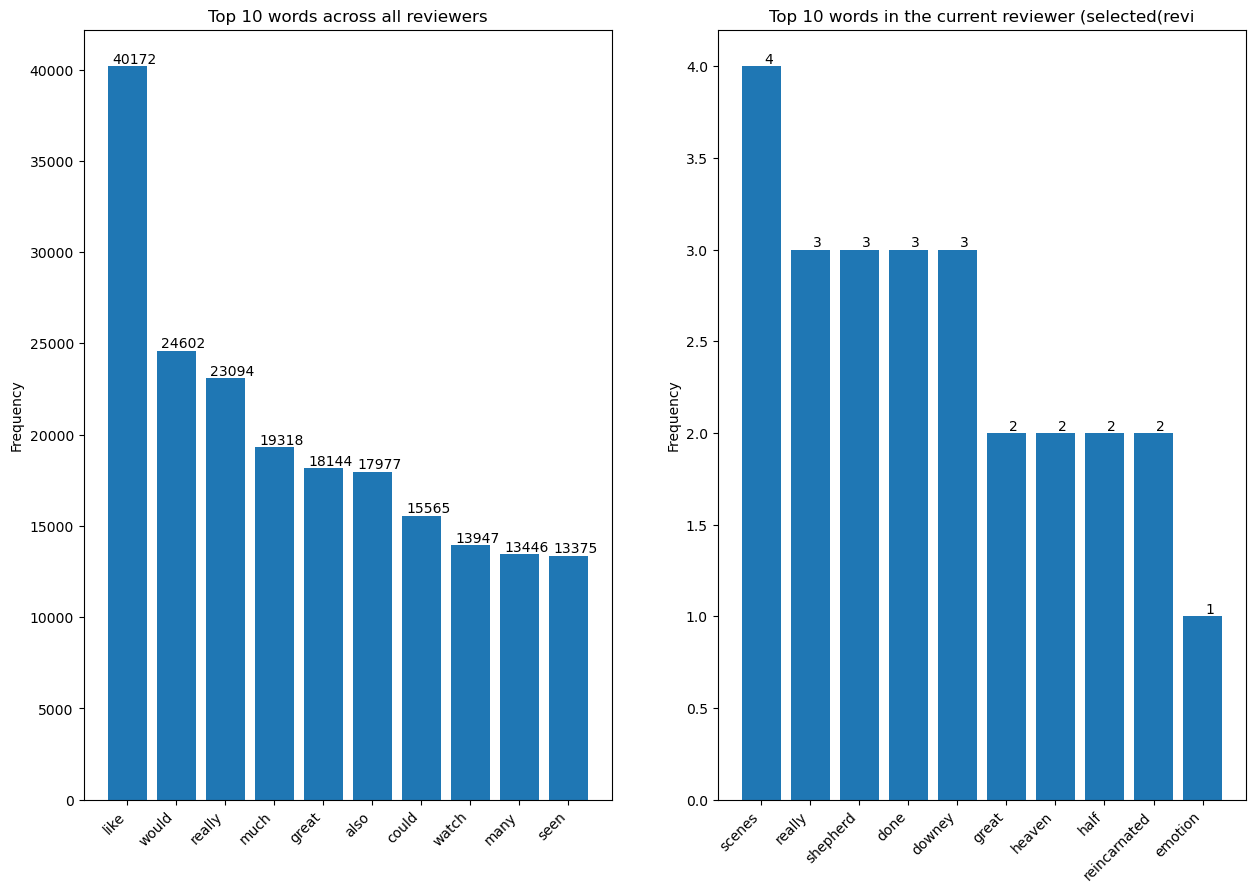

In [10]:
doc = corpus[100]

# Sort the doc for frequency: bow_doc
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

# Create a sorted list from the defaultdict: sorted_word_count 
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

def plot_horizontal_bar(sorted_word_count, dictionary):
    # get the word and word count of the top 15 words
    print("\nTop 10 words across all reviewers:")
    for word_id, word_count in sorted_word_count[:10]:
        print(dictionary.get(word_id), word_count)
        
    print("\nTop 10 words in the current reviewer:")
    for word_id, word_count in bow_doc[:10]:
        print(dictionary.get(word_id), word_count)
        
   # Plot the figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

    # Plot the top 15 words
    ax1.bar(range(len(sorted_word_count[:10])),
            [word_count for _, word_count in sorted_word_count[:10]], align='center')
    ax1.set_xticks(range(len(sorted_word_count[:10])))
    ax1.set_xticklabels([dictionary.get(word_id) for word_id, _ in sorted_word_count[:10]], rotation=45, ha='right')
    ax1.set_title('Top 10 words across all reviewers')
    ax1.set_ylabel('Frequency')# Add data labels

    for i in range(len(sorted_word_count[:10])):
        ax1.annotate(sorted_word_count[i][1], xy=(i, sorted_word_count[i][1]), xytext=(5, 0),
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Plot the top 10 words in the current reviewer
    ax2.bar(range(len(bow_doc[:10])),
            [word_count for _, word_count in bow_doc[:10]], align='center')
    ax2.set_xticks(range(len(bow_doc[:10])))
    ax2.set_xticklabels([dictionary.get(word_id) for word_id, _ in bow_doc[:10]], rotation=45, ha='right')
    ax2.set_title('Top 10 words in the current reviewer (selected(revi')
    ax2.set_ylabel('Frequency')# Add data labels
    for i in range(len(bow_doc[:10])):
        ax2.annotate(bow_doc[i][1], xy=(i, bow_doc[i][1]), xytext=(5, 0),
                    textcoords="offset points",
                    ha='center', va='bottom')
    # Show the plot
    plt.show()

plot_horizontal_bar(sorted_word_count, dictionary)

### 2. Replace the bag-of-words simple model with a model that can discard words not containing useful information (a useful hint is “tf-idf”); use scikit-learn’s TfidfTransformer to convert sample text to vector of tf-idf values

This code initializes the TfidfVectorizer, which is a tool that converts a collection of raw documents into a matrix of TF-IDF features. The stop_words parameter eliminates common words that may not be useful for the analysis. The fit_transform() method then transforms the cleanWords collection into a matrix of TF-IDF features.

In [11]:
# Initialize the TfidfVectorizer 
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
# Print the filtered words
data_train_features = tfidf_vectorizer.fit_transform(cleanWords)
print(data_train_features)

  (0, 5596)	0.06947223248521313
  (0, 10774)	0.08639110421126935
  (0, 89441)	0.05343557219340803
  (0, 78710)	0.07443776893134159
  (0, 95804)	0.07681465371217115
  (0, 25591)	0.10894239136573343
  (0, 27795)	0.07113040343592417
  (0, 49279)	0.05774197212506468
  (0, 64454)	0.08899892585113246
  (0, 21326)	0.05490026349201361
  (0, 79819)	0.0480895248923439
  (0, 77675)	0.06429387466246902
  (0, 19723)	0.06411009916323927
  (0, 40286)	0.08936333543452916
  (0, 23973)	0.12511423857161738
  (0, 362)	0.054779584979082065
  (0, 65695)	0.15041871474117163
  (0, 18520)	0.09600088299097503
  (0, 81732)	0.13803158469334073
  (0, 43789)	0.0793790584314255
  (0, 94079)	0.04987280034736872
  (0, 30497)	0.04750588992940171
  (0, 74124)	0.06588760287944706
  (0, 68279)	0.06517792587941064
  (0, 47606)	0.08699742901243013
  :	:
  (49998, 38814)	0.11332670480168328
  (49998, 66947)	0.09295135732908384
  (49998, 48492)	0.11726324362625026
  (49998, 83868)	0.14664955050499442
  (49998, 8304)	0.0714006

This code bellow is filtering out words from a list of words that have been calculated as having a low tf-idf score. The code is setting a threshold of 0.02 for the tf-idf score, and then filtering out any words that have a tf-idf score below this threshold.

In [12]:
# Get the words that have the lowest tf-idf scores
low_idf_words = tfidf_vectorizer.get_feature_names_out()

# Discard words not containing useful information 
tfidf_threshold = 0.02
filtered_words = [word for word in low_idf_words if data_train_features[0, 
                    tfidf_vectorizer.vocabulary_[word]]  > tfidf_threshold]

# Print the filtered words
print(filtered_words)

['able', 'andrew', 'area', 'available', 'backyard', 'belle', 'book', 'brazil', 'carroll', 'case', 'charge', 'christopher', 'class', 'committed', 'connecticut', 'convicted', 'cover', 'crime', 'criminal', 'days', 'decides', 'detective', 'disclose', 'discover', 'disgrace', 'dramatization', 'emotion', 'eve', 'fallen', 'family', 'forster', 'fuhrman', 'girl', 'grace', 'greenwich', 'halloween', 'hideous', 'high', 'house', 'idaho', 'influence', 'investigate', 'investigation', 'kennedy', 'la', 'lack', 'later', 'locals', 'maggie', 'mark', 'martha', 'meloni', 'mischief', 'mitchell', 'money', 'mother', 'moved', 'moves', 'moxley', 'murder', 'murdered', 'net', 'night', 'old', 'parallel', 'partner', 'perjurer', 'perjury', 'power', 'powerful', 'purpose', 'remained', 'retired', 'rich', 'robert', 'screenplay', 'seven', 'shows', 'simpson', 'snoopy', 'squirm', 'stephen', 'steve', 'support', 'teenager', 'title', 'trial', 'true', 'tv', 'unsolved', 'used', 'vote', 'wealthy', 'weeks', 'welcome', 'writer', 'wr

This code bellow is filtering a column "review" in "movie_data". It is using a function called "remove_special_characters" which will remove any special characters, as well as digits if the parameter "remove_digits" is set to True. The function then returns the filtered text. The filtered text is then applied to the "review" column of the "movie_data" dataframe.

In [13]:
def remove_special_characters(text, remove_digits=True):
    meaningful_words = [w for w in filtered_words if not w in filtered_words] 
    return text
#Apply function on review column
movie_data['review']=movie_data['review'].apply(remove_special_characters)
movie_data

,review,sentiment
0,teenager martha moxley maggie grace moves high...,1
1,really like kris kristofferson usual easy goin...,0
2,spoiler read watching although would waste pl...,0
3,seen wonderful im sure thet would liked much l...,1
4,recently bought dvd forgetting much hated vers...,0
...,...,...
49995,lets start best building although hard believe...,0
49996,british heritage industry control nothing wron...,0
49997,know begin family worst line dialogue ever hea...,0
49998,richard tyler little boy scared everything lik...,0


This code bellow is used to normalize the reviews from a given movie_data set. It splits the data into two parts, trainReviewsNo and testReviewsNo, where trainReviewsNo contains the first 30000 reviews and testReviewsNo contains the remaining reviews. The code then uses the TfidfVectorizer, which stands for term frequency-inverse document frequency, to vectorize the data. This vectoriztion allows us to determine the importance of a word or phrase within a document. The code then transforms the trainReviewsNo and testReviewsNo using the vectoriz and prints the shapes of the vectoriz_train and vectoriz_test which gives the dimensions of the tf-idf values.

In [14]:
trainReviewsNo =movie_data.review[:30000] #normalization of train reviews
testReviewsNo=movie_data.review[30000:] #Normalization of test reviews

vectoriz =TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3)) #vectoriz the range is set to (1,3), meaning that unigrams, bigrams and trigrams will be included in the vocabulary.
vectoriz_train=vectoriz.fit_transform(trainReviewsNo) #transform train reviews
vectoriz_test=vectoriz.transform(testReviewsNo) #transform train reviews
print('tf-idf values - train:',vectoriz_train.shape) # print 
print('tf-idf values - test:',vectoriz_test.shape)

tf-idf values - train: (30000, 4684738)
tf-idf values - test: (20000, 4684738)


### 3. Split data into train and test sets of equal size; create a logistic regression model that takes tfidf vectors and use it for sentiment analysis task

This code bellow is creating a sentiment label for the movie data using the LabelBinarizer() function. The sentimentLabel variable is created to store the labeling of the sentiment data. The sentiment variable is then used to store the transformed sentiment data that has been fit using the LabelBinarizer() function. Finally, the shape of the sentiment variable is printed.

In [15]:
sentimentLabel=LabelBinarizer() #labeling the sentient data
sentiment =sentimentLabel.fit_transform(movie_data['sentiment'])#transformed sentiment data
print(sentiment.shape)

(50000, 1)


This code bellow is splitting the sentiment data into two parts, a train sentiment and a test sentiment. The train sentiment will contain the first 30000 elements from the sentiment list and the test sentiment will contain the remaining elements. The print statements are then used to print out the two lists.

In [16]:
#Spliting the sentiment data
train_sentiment=sentiment[:30000]
test_sentiment=sentiment[30000:]
print(train_sentiment)
print(test_sentiment)

[[1]
 [0]
 [0]
 ...
 [1]
 [1]
 [0]]
[[1]
 [1]
 [0]
 ...
 [0]
 [0]
 [1]]


This code bellow is importing the LogisticRegression and SGDClassifier classes from the sklearn.linear_model module, as well as the classification_report, confusion_matrix, and accuracy_score functions from the sklearn.metrics module. It then creates a LogisticRegression object with the parameters of penalty='l2', max_iter=500, C=1, and random_state=42. Finally, it fits the LogisticRegression model to the vectorized training data and training sentiment data and prints the model.

In [17]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(vectoriz_train,np.ravel( train_sentiment))
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)


This code bellow is predicting a model using the tfidf feature. The lr_tfidf_predict variable is a logistic regression model and the vectoriz_test variable is a set of tfidf features. The code is predicting the model using the logistic regression model and the tfidf features and then printing out the prediction. 

The result of this code is an array of predicted values generated by the model trained on the tfidf features. These values represent the model's prediction of the class (positive or negative sentiment) for each test datapoint.

In [18]:
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(vectoriz_test)
print(lr_tfidf_predict)

[0 1 0 ... 0 0 1]


This code bellow is calculating the accuracy score for the tfidf features. The accuracy score is the percentage of test sentiment that is accurately predicted by the logistic regression model using tfidf features. The result of this code is the accuracy score of 73%, meaning 73% of the test sentiment was accurately predicted by the model.

In [19]:
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiment,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_tfidf_score : 0.73095


This code bellow is producing a classification report for a logistic regression model that is using term frequency-inverse document frequency (tf-idf) features. The report shows the precision, recall, and F1-score for both Positive and Negative labels. The accuracy of the model is 73%. The macro average and the weighted average are both 73%. This indicates that the model is doing a decent job of correctly predicting both Positive and Negative labels.

In [20]:
#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiment,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.72      0.75      0.74      9994
    Negative       0.74      0.71      0.73     10006

    accuracy                           0.73     20000
   macro avg       0.73      0.73      0.73     20000
weighted avg       0.73      0.73      0.73     20000



This confusion matrix bellow shows the results of a classification task, in which the model is attempting to classify a given set of text data as either 1 or 0. The matrix shows the number of correctly classified data points (7113 and 7506) as well as the number of incorrectly classified data points (2893 and 2488). The rows represent the actual classifications, while the columns represent the predicted classifications.

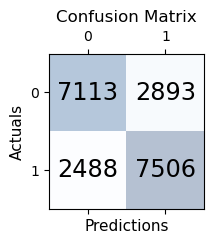

In [21]:
#confusion matrix for tfidf features
conf_matrix=confusion_matrix(test_sentiment,lr_tfidf_predict,labels=[1,0])
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(2, 3))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=11)
plt.ylabel('Actuals', fontsize=11)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

### Word Cloud

The result of this code bellow is a figure with two word clouds showing the data from the two different data sources. The figure will have a title of 'Word Cloud Comparison' and two subplots with titles of 'Positive' and 'Negative.'

In [22]:
def create_wordclouds(data1, data2):
    positive_text=data1
    wordcloud1 = WordCloud(width=1000,height=500,max_words=5000,min_font_size=10, colormap="Dark2",
               max_font_size=190, random_state=42).generate(positive_text)

    negative_text=data2
    wordcloud2 = WordCloud(width=1000,height=500,max_words=5000,min_font_size=10, colormap="Dark2",
               max_font_size=190, random_state=42).generate(negative_text)

    #creating figure
    fig = plt.figure(figsize=(20,6))

    #adding axes to the figure
    ax = fig.add_subplot(1,2,1)
    ax.imshow(wordcloud1, interpolation='bilinear')
    ax.set_title('Postive')

    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(wordcloud2, interpolation='bilinear')
    ax2.set_title('Negative')

    #adding title to the figure
    fig.suptitle('Word Cloud Comparision', fontsize=20)

    #showing the figure
    return plt.show()

### Find the sentiment of a given movie review

In this case will show data from reviewer 8 classified as positive and reviewier 5 classifiead as negative.  
This code would create two wordclouds based on the reviews in the movie_data dataset for the eighth and fifth reviews in the dataset. The wordclouds would be visual representations of the review text, with each word appearing a size relative to how often it appears in the review.

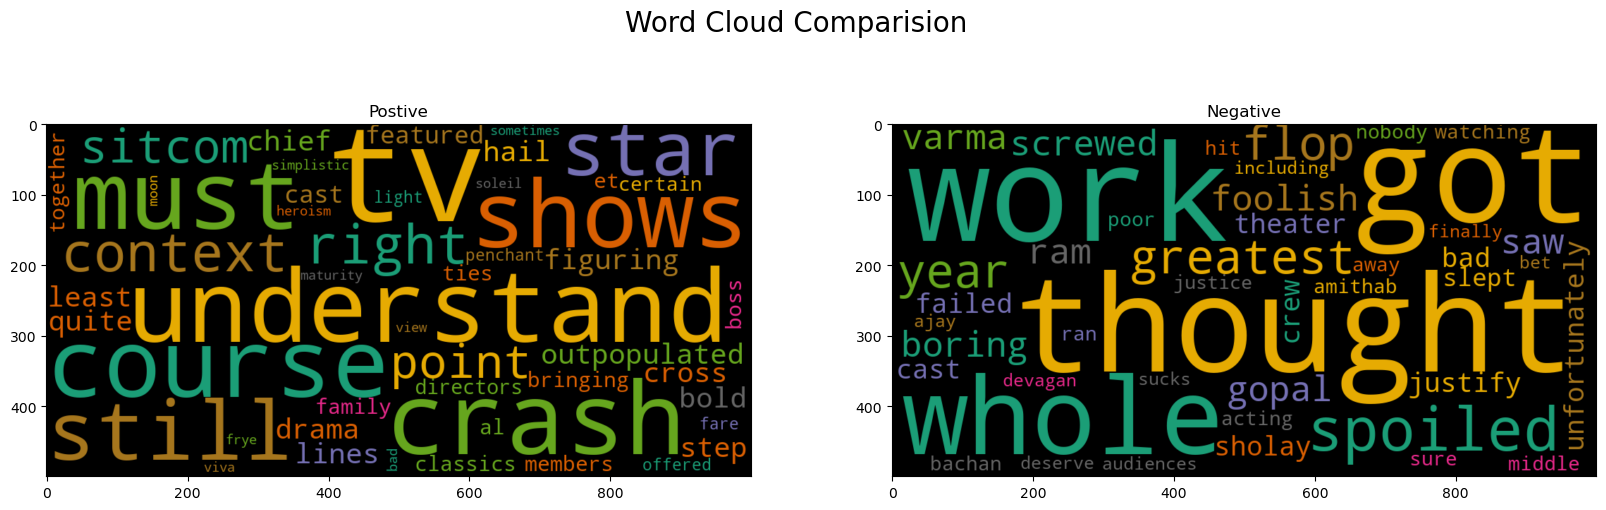

In [23]:
movie_data1 = movie_data.review
create_wordclouds(movie_data1[7], movie_data1[21])

### Find the sentiment across all movie reviewer

This code bellow will result in two strings, data0 and data1, which will contain the data from the movie_data dataframe for all rows where the sentiment column is equal to 0 (negative) and 1 (positive), respectively. Each string will contain all the data from the dataframe for the rows that match the sentiment criteria.

In [24]:
df = pd.DataFrame(movie_data) 

# select one row by value 
row0 = df.loc[df['sentiment'] == 0] # negative
row1 = df.loc[df['sentiment'] == 1] # positive

# Convert row to string
data0 = row0.to_string() 
data1 = row1.to_string() 

##### Summary of all reviews comparing positive and negative sentiments

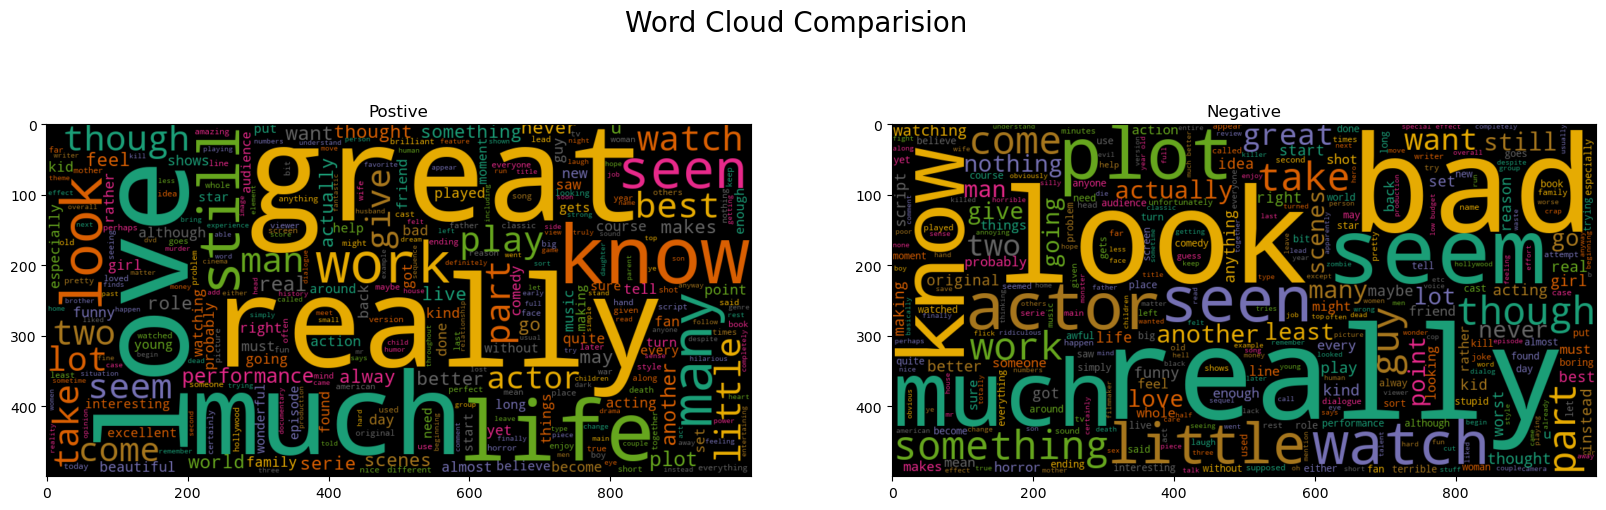

In [25]:
create_wordclouds(data1, data0)

### Conclusion

In this project, we used logistic regression to predict the sentiment of a given movie review. The model was able to achieve an accuracy of 73% on the test set, indicating that it was able to accurately predict the sentiment of a given movie review with a relatively high degree of accuracy. This indicates that the model was able to accurately predict the sentiment of a given movie review with a relatively high degree of accuracy.